In [1]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import datetime as dt

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates

In [2]:
import shapefile as shp

In [3]:
sf = shp.Reader("taxi_zones/taxi_zones")

In [4]:
shps = list(sf.iterShapeRecords())

In [5]:
dir(shps[0])

['__doc__', '__init__', '__module__', 'record', 'shape']

In [6]:
shps[0].shape

<shapefile._Shape instance at 0x7ff489900908>

In [7]:
shps[0].record

[1, '1.16357453189e-001', '7.82306788500e-004', 'Newark Airport', 1, 'EWR']

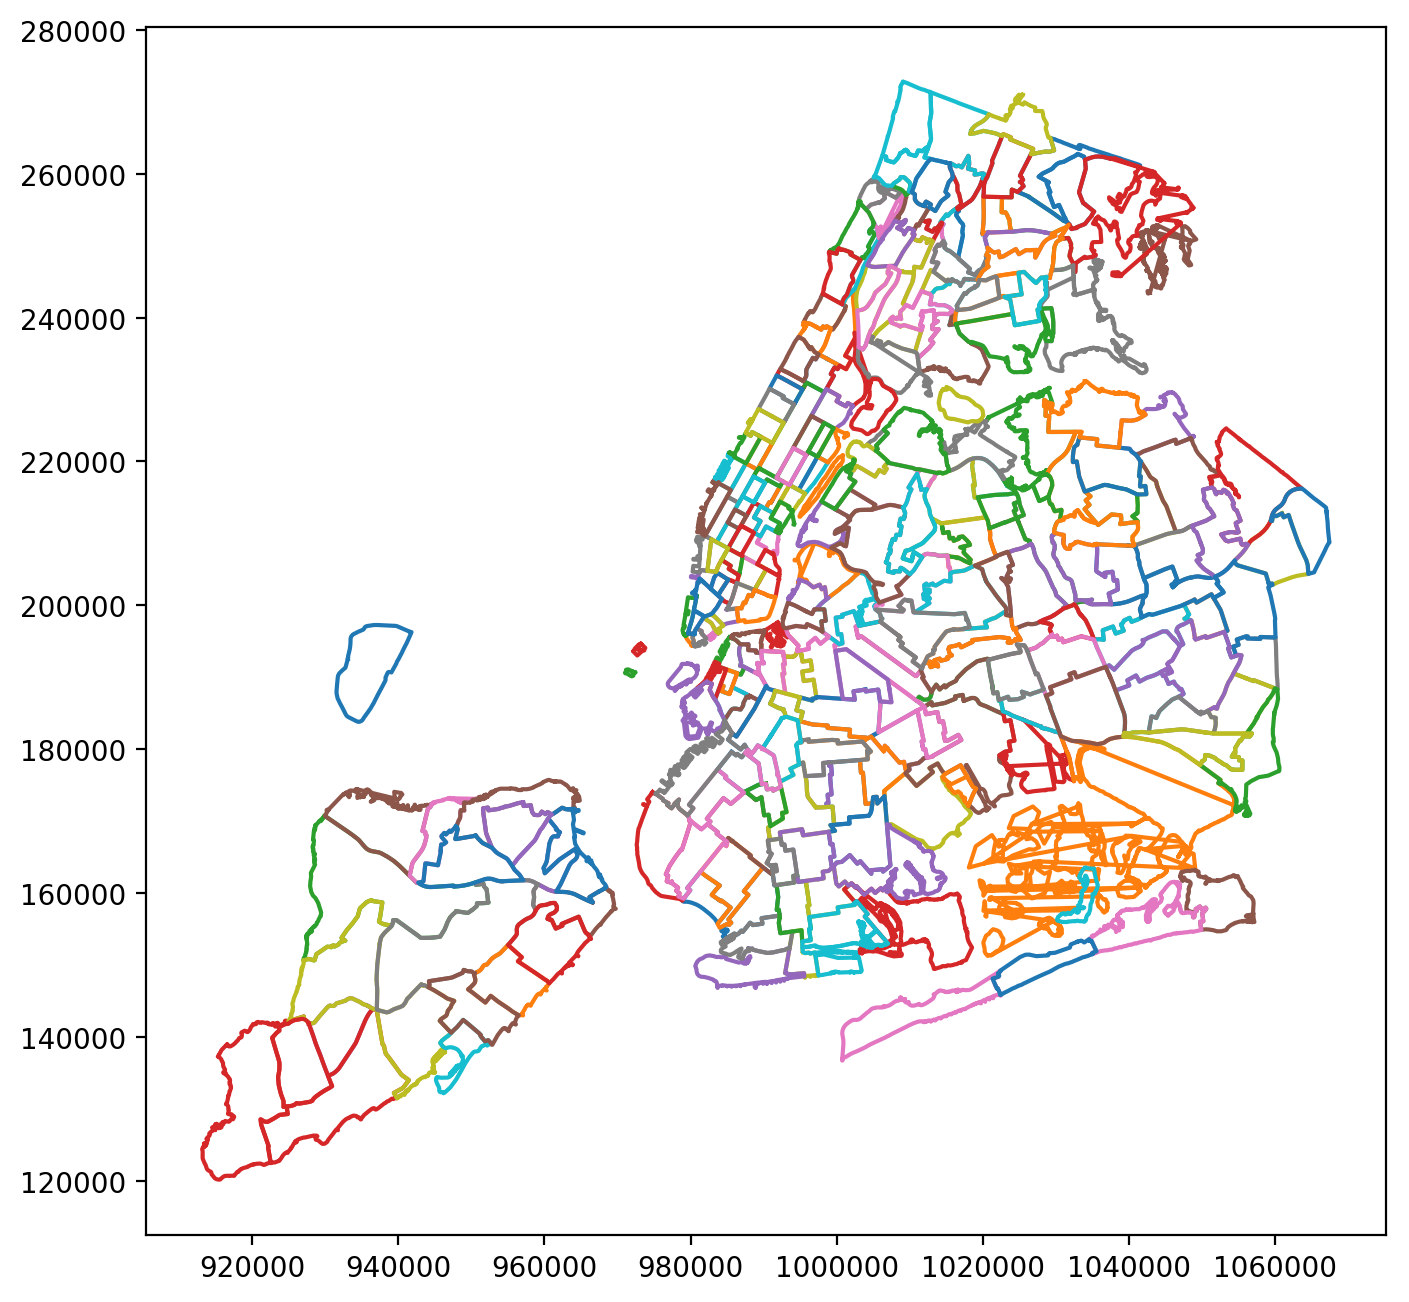

In [8]:
plt.figure(figsize=(8,8))
for shape in shps:
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [11]:
shps[0].shape.points

[(933100.9183527103, 192536.08569720192),
 (933091.0114800561, 192572.17526147654),
 (933088.5848363293, 192604.9701013019),
 (933121.5604029286, 192857.3815947791),
 (933149.268070866, 192978.64529974),
 (933222.303599316, 193293.27321561542),
 (933252.5816221443, 193450.60036714407),
 (933297.7228000937, 193555.43279791903),
 (933330.5712151835, 193748.8233831425),
 (933350.6320882778, 193794.68697530977),
 (933355.7056937596, 193834.0240346551),
 (933365.7979032588, 193886.46647872418),
 (933431.7392324115, 194391.29051182547),
 (933465.0379729305, 194801.09275264665),
 (933463.4338186719, 195227.36293221635),
 (933471.1052103372, 195315.8792411817),
 (933483.7536692393, 195397.82719968376),
 (933511.4361339996, 195509.2545406304),
 (933554.0907006934, 195620.65066105462),
 (933609.1944352826, 195718.9049942211),
 (933669.2474974946, 195797.47528837126),
 (933731.7750771455, 195866.2036557206),
 (933779.2756322531, 195908.73159505273),
 (933841.7617821106, 195957.78647365439),
 (933

In [16]:
dir(shps[1].shape)

['__doc__',
 '__geo_interface__',
 '__init__',
 '__module__',
 'bbox',
 'parts',
 'points',
 'shapeType']

# GeoJSON

https://mygeodata.cloud/

Test with

http://geojson.io/#map=11/40.6702/-73.9751

In [18]:
import json

gjs = json.load(open('taxi_zones.geojson', 'r'))

In [22]:
len(gjs['features'])

263

In [32]:
gjs['features'][33]['geometry']['coordinates'][0][:5]

[[[-73.972320321199, 40.70908288315217],
  [-73.97066975742995, 40.70725970882147],
  [-73.97054062182238, 40.70731607635383],
  [-73.9702621853228, 40.70688750428401],
  [-73.97048881848585, 40.70540066562183],
  [-73.97016894509909, 40.70536185340731],
  [-73.97018075572805, 40.70492927056683],
  [-73.96762114779943, 40.70334850519435],
  [-73.96751516691086, 40.70343735687813],
  [-73.96747674493034, 40.703949870956215],
  [-73.96833263747038, 40.70448338458415],
  [-73.96929693837701, 40.70508833122962],
  [-73.96923632685237, 40.70599431249845],
  [-73.96929296374243, 40.707093331047766],
  [-73.96838933699995, 40.7068291869999],
  [-73.967951391, 40.70573121699989],
  [-73.96761547799979, 40.70496163499989],
  [-73.96720961999985, 40.70425570899992],
  [-73.96653747199994, 40.70369661299984],
  [-73.96607413599993, 40.70332015299992],
  [-73.965874186, 40.70315769499991],
  [-73.9652043899999, 40.702622744999864],
  [-73.96451844799995, 40.702074977999885],
  [-73.96386889399994,

In [23]:
gjs['features'][3]

{u'geometry': {u'coordinates': [[[-73.97177410965318, 40.72582128133706],
    [-73.97179142961484, 40.725814221149086],
    [-73.97181650587731, 40.72581496675258],
    [-73.97185935830923, 40.72558296903032],
    [-73.97187437695212, 40.725503116079736],
    [-73.97188490951471, 40.72542440506575],
    [-73.97191120732053, 40.7252903706999],
    [-73.97193374501082, 40.72517629035116],
    [-73.97193975456328, 40.72515803861004],
    [-73.97196154778592, 40.72503997881086],
    [-73.97200511841213, 40.72484148970816],
    [-73.97203666966881, 40.72468407002009],
    [-73.97206595867397, 40.72455915832873],
    [-73.97207196960339, 40.72453635085808],
    [-73.97208098151924, 40.72449756793038],
    [-73.97208400057282, 40.72446790554569],
    [-73.97209751290907, 40.72442341523471],
    [-73.97215609001734, 40.724170178278094],
    [-73.97216585996632, 40.72413196327314],
    [-73.9722169237619, 40.72393005464676],
    [-73.9722334467696, 40.72384677992629],
    [-73.97226499868246, 4

ValueError: You passed in an invalid linestyle, `.`.  See docs of Line2D.set_linestyle for valid values.

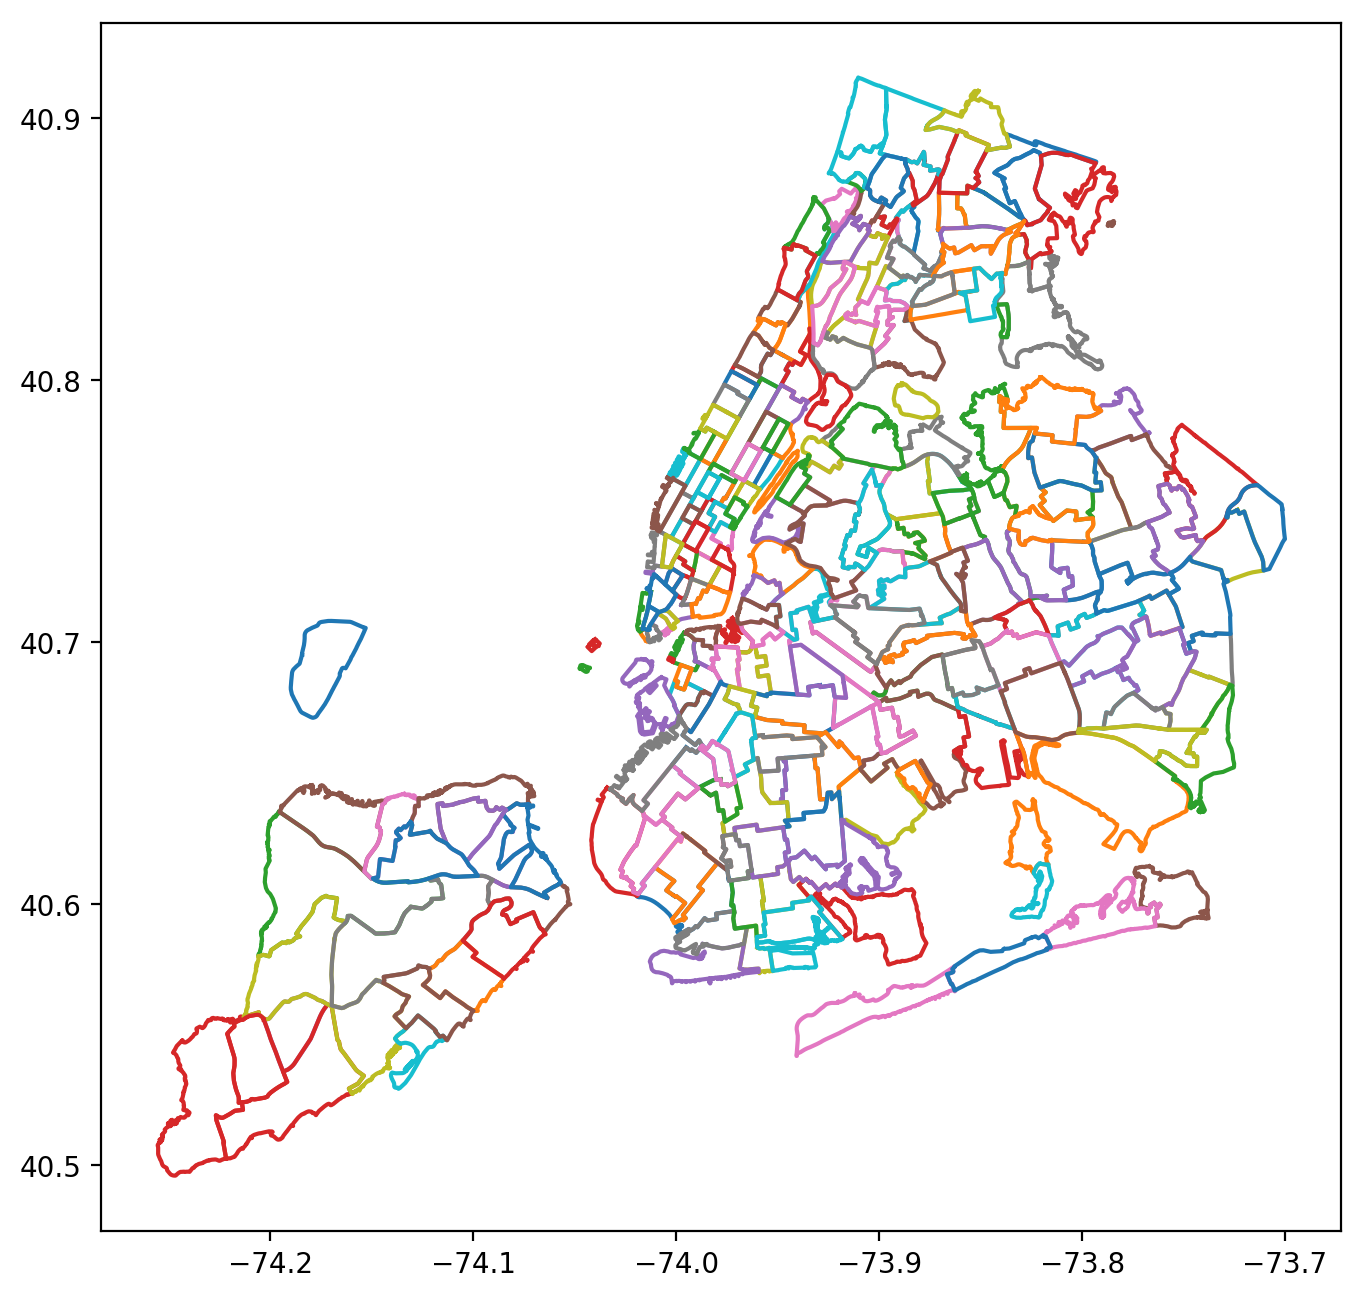

In [55]:
plt.figure(figsize=(8,8))
test_lon, test_lat = -73.98, 40.725
for feature in gjs['features']:
    coords = feature['geometry']['coordinates'][0]
    if len(coords) < 3:
        coords = coords[0]
    x = [i[0] for i in coords]
    y = [i[1] for i in coords]
    plt.plot(x,y)
plt.axhline(y=test_lat, linewidth=1, color='k', linestyle='--')|
plt.show()

In [44]:
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# construct point based on lon/lat returned by geocoder
point = Point(-73.98, 40.725)

# check each polygon to see if it contains the point
for feature in gjs['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(point):
        print ('Found containing polygon:', json.dumps(feature['properties'], indent=2))

Found containing polygon: {
  "Shape_Area": 0.000111871946192, 
  "OBJECTID": 4, 
  "zone": "Alphabet City", 
  "LocationID": 4, 
  "Shape_Leng": 0.0435665270921, 
  "borough": "Manhattan"
}
